**3.1 Warming Up Exercises - Basic Inspection and Exploration:**


Problem 1 - Data Read, Write and Inspect:

In [ ]:
#Importing pandas
import pandas as pd

#(1).Loading the bank.csv file
file_path='bank.csv';
dataset = pd.read_csv(file_path)

#2(a). Printing the columns with the data types "object"
col_object = dataset.select_dtypes(include='object').columns
print("\nColumns with dtype=object:")
print()
print(col_object)
print()

#(b). Printing the unique values of that columns
print("\nUnique Values in Columns:")
print()
for column in col_object:
    unique_values = dataset[column].unique()
    print(f"{column}: {unique_values}")
print()

# (c) Checking for the total number of null values in each column
null_values = dataset.isnull().sum()
print("Null values in each column:")
print()
print(null_values)
print()

# (3).Dropping all columns with dtype=object
numeric_dataset = dataset.drop(columns=col_object)

# Saving the new DataFrame to banknumericdata.csv file
numeric_dataset.to_csv('banknumericdata.csv', index=False)
print("\nNumeric dataset saved as 'banknumericdata.csv'.")
print()

# (4)Reading the dataset
data = pd.read_csv('banknumericdata.csv')

# Summary statistics
print("Summary Statistics of Numeric Data:")
print()
print(data.describe())



Columns with dtype=object:

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


Unique Values in Columns:

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']

Null values in each column:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


N

Problem 2 - Data Imputations:

In [ ]:
import pandas as pd

#(1).
#Loading the dataset
df = pd.read_csv("medical_students_dataset.csv")

#(2).
#Printing the 5 rows and formatting it to string.
print(df.head().to_string(index=False))
print("\nColumns with Missing Values:")
#Finding the total number of missing values of the dataset
print(df.isnull().sum())
print()

#(3).
#Filling those missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # For categorical columns filling with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # For  numerical columns filling with mean
            df[column].fillna(df[column].mean(), inplace=True)

#Printing to see if there are any missing values left
print("Missing values after filling:")
print(df.isnull().sum())
print()


#(4).
#Checks if there are any duplicate rows and returns boolean
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# If duplicates are found, drop them
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

# Confirm duplicates are handled
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

# Save the cleaned dataset
df.to_csv("medical_student_new.csv", index=False)
print("Cleaned dataset saved as 'medical_student_new.csv'.")

 Student ID  Age Gender     Height    Weight Blood Type       BMI  Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking
        1.0 18.0 Female 161.777924 72.354947          O 27.645835          NaN        95.0           109.0        203.0       No     NaN
        2.0  NaN   Male 152.069157 47.630941          B       NaN    98.714977        93.0           104.0        163.0       No      No
        3.0 32.0 Female 182.537664 55.741083          A 16.729017    98.260293        76.0           130.0        216.0      Yes      No
        NaN 30.0   Male 182.112867 63.332207          B 19.096042    98.839605        99.0           112.0        141.0       No     Yes
        5.0 23.0 Female        NaN 46.234173          O       NaN    98.480008        95.0             NaN        231.0       No      No

Columns with Missing Values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI 

<ipython-input-7-17176e975790>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-7-17176e975790>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Missing values after filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Number of duplicate rows: 12572
Duplicate rows removed.
Number of duplicate rows after removal: 0
Cleaned dataset saved as 'medical_student_new.csv'.


Problem: 1
The mean fare is: 84.1546875
The meadian fare is: 60.287499999999994
The max fare is: 512.3292
The min fare is: 0.0
Problem: 2
The null age count is: 30
Number of rows after dropping null values in 'Age': 216

Problem: 3
One-hot encode 'Embarked' is :

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  E

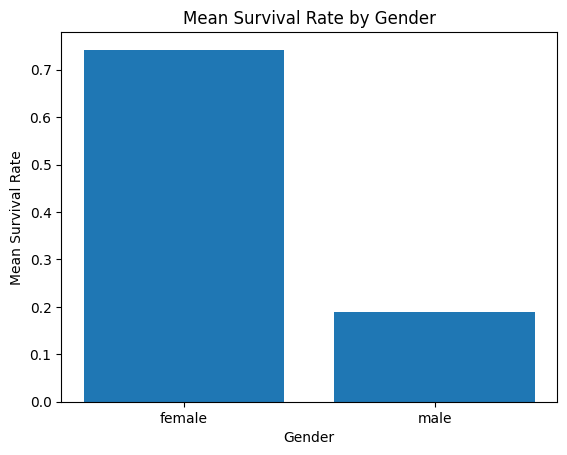


Problem: 5



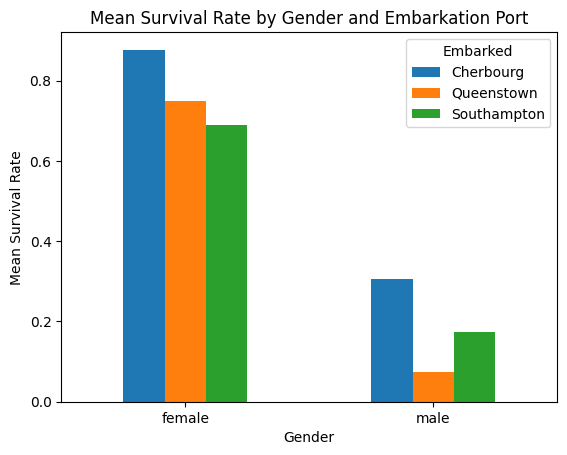

In [ ]:
#Importing pandas
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Problem 1: Subset the DataFrame and calculate statistics for 'Fare'
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df_first_class = df_subset[df_subset['Pclass'] == 1]
mean_fare = df_first_class['Fare'].mean()
median_fare = df_first_class['Fare'].median()
max_fare = df_first_class['Fare'].max()
min_fare = df_first_class['Fare'].min()

print("Problem: 1")
print("The mean fare is:",mean_fare)
print("The meadian fare is:",median_fare)
print("The max fare is:",max_fare)
print("The min fare is:",min_fare)

# Problem 2: Count and drop null values in 'Age'
null_age_count = df_first_class['Age'].isnull().sum()
print("Problem: 2")
print("The null age count is:",null_age_count)

df_first_class_clean = df_first_class.dropna(subset=['Age'])
print(f"Number of rows after dropping null values in 'Age': {len(df_first_class)}")
print()


# Problem 3: One-hot encode 'Embarked' and drop the original column
df_one_hot = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
print("Problem: 3")
print("One-hot encode 'Embarked' is :")
print()
print(df_one_hot.head())
# df_one_hot[df_one_hot.columns[df_one_hot.columns.str.startswith('Embarked')]] = df_one_hot[df_one_hot.columns[df_one_hot.columns.str.startswith('Embarked')]].astype(int)


# Problem 4: Mean survival rate by gender
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
plt.bar(mean_survival_by_sex.index, mean_survival_by_sex.values)
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
print()
print("Problem: 4")
print()
plt.show()

# Problem 5: Survival rates by gender and embarkation port
mean_survival_by_sex_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
mean_survival_by_sex_embarked.plot(kind='bar')
plt.title('Mean Survival Rate by Gender and Embarkation Port')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Embarked', labels=['Cherbourg', 'Queenstown', 'Southampton'])
print()
print("Problem: 5")
print()
plt.show()


